In [ ]:
!pip install autokeras

In [ ]:
!pip install tensorflow==2.15

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency re

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [ ]:
ls

 02BC73FD-35A1-4A4E-8534-18287BC30D00.png
 047F4D6A-8D39-44F3-820D-C6861CB71A50.png
'07_1105210013_Talita Sri Indrayuni.xlsx'
 073EE129-D3E4-44EB-BCB7-6EDC55B321C1.png
 0A679673-7B0A-4573-91A1-B9C1441B89B6.jpeg
 0FBA4E5F-528E-4A5C-B8E7-96330EA49CCE.png
'1105210013_Indrayuni_Tugas M01.gdoc'
 1105210013.pdf
'1105210013_talita sri indrayuni_tb4501_tugas minggu 1'/
 1105210013_Talita.zip
 1105210013_TugasM02.gdoc
 1_1105210013_Talita.pdf
 1142B170-8CD8-40CC-869B-8794A781F80D.png
 1184B07C-A0F7-4317-85BC-910AA791F903.png
 1644E513-08F9-4F19-BC25-931F9FFFE55D.png
 1CA5DAFD-9241-4A04-97AA-05E1603234A0.png
 1D1FE335-6B28-4F50-97AE-615D69CF7D13.jpeg
 1D48090E-AB35-4C35-9385-76B3A2DF7EEA.png
 20200406_155555_0000.png
 22D9DADC-35B9-45BB-99C7-23D48B9491F9.png
 22E34E52-C102-41C6-A97F-94D20B07E2A5.png
'23_TALITA SRI INDRAYUNI.MOV'
 3140FD99-4682-4970-8413-28FA1DD0C6A5.png
 327BBD37-6F23-407F-B216-CC28D8F8F746.png
 33967792-1A7D-47A6-897F-5F9BA9979024.png
 34C6A88C-E730-4E2A-9D38-8338B8F4373A.png
 

In [ ]:
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import datetime
import time

labels = np.array([0, 1, 2, 0, 1])
one_hot_labels = np.eye(3)[labels]  # Melakukan one-hot encoding

print(one_hot_labels)

img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'

train_data_dir = '/content/gdrive/My Drive/SBC/train/train/'
test_data_dir = '/content/gdrive/My Drive/SBC/test/test/'
validation_data_dir = '/content/gdrive/My Drive/SBC/val/val/'

epochs = 100

batch_size = 8


vgg16 = applications.VGG16(include_top=False, weights='imagenet')
vgg16.summary() #Arsitekturnya Wan

datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen = ImageDataGenerator(#rescale=1. / 255)
        rescale=1. / 255,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

#Pre train Training
start = datetime.datetime.now()

train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_width, img_height),
      batch_size=batch_size,
      class_mode=None,
      shuffle=False)

nb_train_samples = len(train_generator.filenames)
num_classes = len(train_generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(train_generator, predict_size_train)

np.save('/content/gdrive/My Drive/bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

#Pre-train Validation cuy
start = datetime.datetime.now()
generator = datagen.flow_from_directory(
      validation_data_dir,
      target_size=(img_width, img_height),
      batch_size=batch_size,
      class_mode=None,
      shuffle=False)

nb_validation_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = vgg16.predict_generator(
      generator, predict_size_validation)

np.save('/content/gdrive/My Drive/bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

#Pre train Testing
start = datetime.datetime.now()
generator = datagen.flow_from_directory(
      test_data_dir,
      target_size=(img_width, img_height),
      batch_size=batch_size,
      class_mode=None,
      shuffle=False)

nb_test_samples = len(generator.filenames)

predict_size_test = int(math.ceil(nb_test_samples / batch_size))

bottleneck_features_test = vgg16.predict_generator(
      generator, predict_size_test)

np.save('/content/gdrive/My Drive/bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 


<ipython-input-6-0485d1d91a1c>:63: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(train_generator, predict_size_train)


Time:  0:02:27.693655
Found 44 images belonging to 2 classes.


<ipython-input-6-0485d1d91a1c>:84: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(


Time:  0:00:41.095812
Found 44 images belonging to 2 classes.


<ipython-input-6-0485d1d91a1c>:105: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_test = vgg16.predict_generator(


Time:  0:00:41.093641


Found 231 images belonging to 2 classes.
Found 44 images belonging to 2 classes.



Epoch 1: val_acc improved from -inf to 0.65909, saving model to /content/gdrive/My Drive/models/vgg16/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_acc improved from 0.65909 to 0.70455, saving model to /content/gdrive/My Drive/models/vgg16/best_model.h5

Epoch 3: val_acc did not improve from 0.70455

Epoch 4: val_acc did not improve from 0.70455

Epoch 5: val_acc improved from 0.70455 to 0.81818, saving model to /content/gdrive/My Drive/models/vgg16/best_model.h5

Epoch 6: val_acc did not improve from 0.81818

Epoch 7: val_acc did not improve from 0.81818

Epoch 8: val_acc did not improve from 0.81818

Epoch 9: val_acc did not improve from 0.81818

Epoch 10: val_acc did not improve from 0.81818

Epoch 11: val_acc did not improve from 0.81818

Epoch 12: val_acc did not improve from 0.81818

Epoch 13: val_acc did not improve from 0.81818

Epoch 14: val_acc did not improve from 0.81818

Epoch 15: val_acc improved from 0.81818 to 0.84091, saving model to /content/gdrive/My Drive/models/vgg16/best_model.h5
Epoch 15: early stopping
6/6 [==============================] - 0s 6ms/step - loss: 0.5616 - acc: 0.8409
[INFO] accur

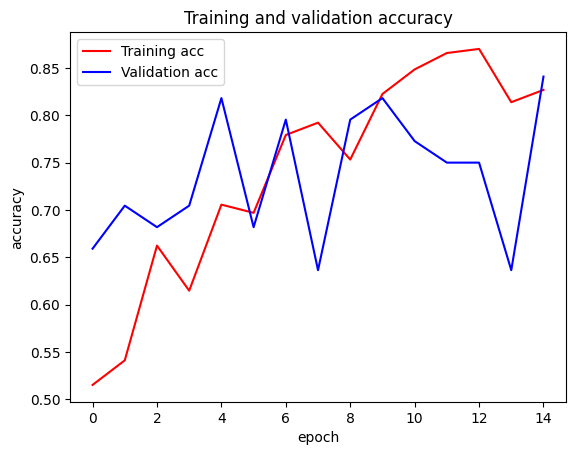

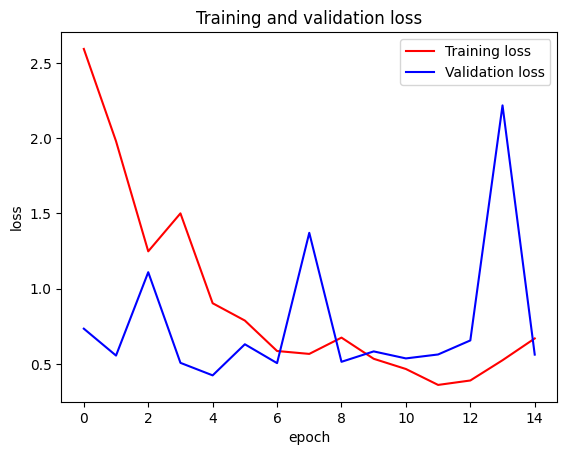

2/2 [==============================] - 0s 12ms/step - loss: 0.5616 - acc: 0.8409
[0.5616164207458496, 0.8409090638160706]
2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

      normal       0.89      0.86      0.87        28
inflammation       0.76      0.81      0.79        16

   micro avg       0.84      0.84      0.84        44
   macro avg       0.83      0.83      0.83        44
weighted avg       0.84      0.84      0.84        44
 samples avg       0.84      0.84      0.84        44

Confusion matrix tanpa normalisasi 





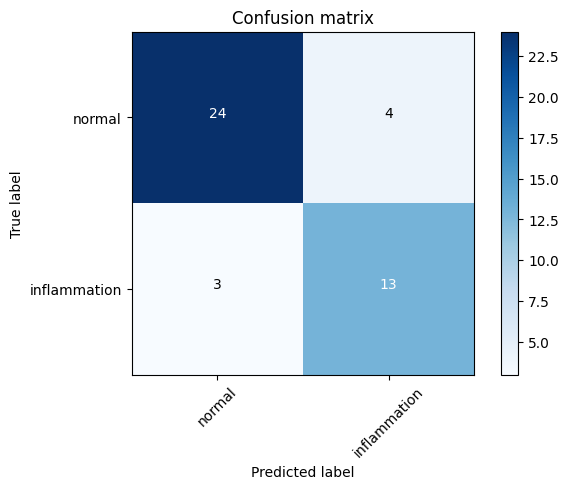

confusion matrix yang dinormalisasi 





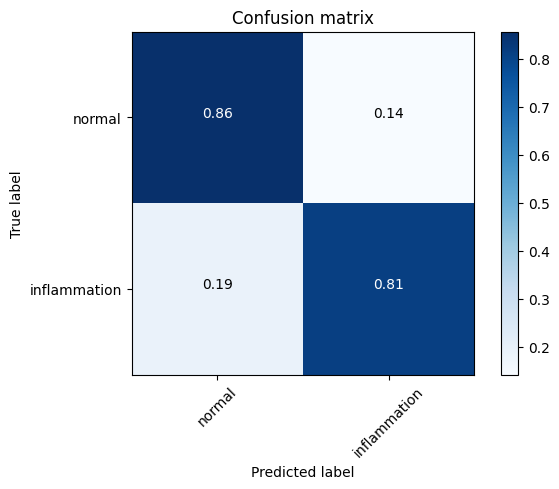

In [ ]:
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import datetime
import time
from keras.layers import LeakyReLU

labels = np.array([0, 1, 2, 0, 1])
one_hot_labels = np.eye(3)[labels]  # Melakukan one-hot encoding

#TRAINING
hasil= []
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix yang dinormalisasi \n\n\n")
    else:
        print('Confusion matrix tanpa normalisasi \n\n\n')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


img_width, img_height = 224, 224
top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/content/gdrive/My Drive/SBC/train/train/'
test_data_dir = '/content/gdrive/My Drive/SBC/test/test/'
batch_size = 8
datagen = ImageDataGenerator(rescale=1. / 255)

#training data
generator_top = datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

train_data = np.load('/content/gdrive/My Drive/bottleneck_features_train.npy')

train_labels = generator_top.classes

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=num_classes)

#testing data
generator_top = datagen.flow_from_directory(
         test_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_test_samples = len(generator_top.filenames)

test_data = np.load('/content/gdrive/My Drive/bottleneck_features_test.npy')


test_labels = generator_top.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

#Lanjut training
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

lr=0.001
opt='adam'

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=lr),
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('/content/gdrive/My Drive/models/vgg16/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


# Example continuation of the code
history = model.fit(train_data, train_labels,
      epochs=100,
      batch_size=batch_size,
      validation_data=(test_data, test_labels),
      verbose=0,
      callbacks=[es, mc])

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 test_data, test_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

model.summary()

#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plotacc = plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plotacc.savefig("/content/gdrive/My Drive/gambar/vgg16/train/Acc_VGG16_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

plotloss = plt.figure(2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plotloss.savefig("/content/gdrive/My Drive/gambar/vgg16/train/Loss_VGG16_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

Evaluasi=model.evaluate(test_data, test_labels)
print(Evaluasi)

preds = np.round(model.predict(test_data),0)
score = model.predict(test_data)

view = ["normal", "inflammation"]
classification_metrics = metrics.classification_report(test_labels, preds, target_names=view )
print(classification_metrics)

categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

plotcmnn = plt.figure(3)
plot_confusion_matrix(confusion_matrix, ["normal", "inflammation"])
plt.show()
plotcmnn.savefig("/content/gdrive/My Drive/gambar/vgg16/train/CMNN_VGG16_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

plotcmn = plt.figure(4)
plot_confusion_matrix(confusion_matrix, ["normal", "inflammation"], normalize=True)
plt.show()
plotcmn.savefig("/content/gdrive/My Drive/gambar/vgg16/train/CMN_VGG16_{}Batch_{}E_Opt={}_lr={}.jpg".format(batch_size, len(acc),opt,lr))

AUC Score: 0.8660714285714286


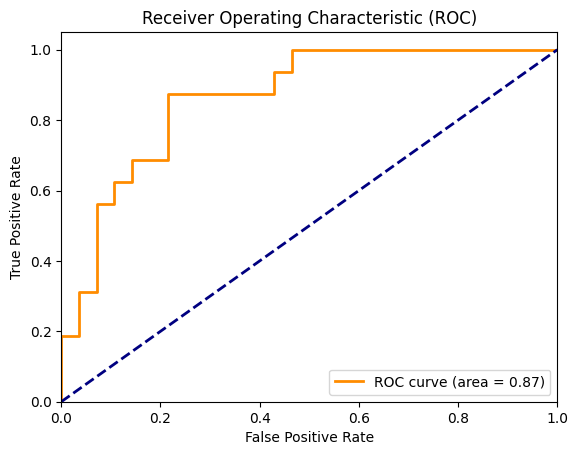

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


# Assuming 'score' contains the predicted probabilities of the positive class
auc_score = roc_auc_score(test_labels[:, 1], score[:, 1])
print("AUC Score:", auc_score)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels[:, 1], score[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()